## The NPRI Case Study

The National Pollutant Release Inventory (NPRI) is a public inventory of releases, disposals and transfers of over 320 pollutants from over 7,000 facilities in Canada. The Government of Canada provides an API to access the data of reported values for companies and facilities across the country.

You can explore the data set through the NPRI website here: https://pollution-waste.canada.ca/national-release-inventory/

### Part 1. Getting the Data for Analysis 


The first part of the case study involves retrieving, rectifying and cleaning the data you will need for your analysis. At the end of this part of the case study you will have a CSV file you can use as your source data and you won't need to query the API every time you want to perform your analysis.

Load the Pandas library (1 mark).

In [10]:
import pandas as pd
import ssl

Use the following URL to download the air release emissions for 2020 and 2021 for the pollutant Nitrogen Dioxide.

In [38]:
api_address = "https://pollution-waste.canada.ca/sradapi/v2/npri/Search/?fromYear=2020&toYear=2021&categoryId=2&substanceID=13506&length=10000"
import requests


Write the Pandas code to load the JSON from the <code>api_address</code> (3 marks).

In [45]:
data = pd.read_json(api_address)


List the top 10 records in the data frame to review the structure (1 mark).

In [46]:
print(data.head(10))
#print(data.columns)

   recordsTotal  recordsFiltered  \
0          7147             7147   
1          7147             7147   
2          7147             7147   
3          7147             7147   
4          7147             7147   
5          7147             7147   
6          7147             7147   
7          7147             7147   
8          7147             7147   
9          7147             7147   

                                                data  
0  {'npriID': 1, 'ghgrpID': None, 'year': 2020, '...  
1  {'npriID': 1, 'ghgrpID': 'G10009', 'year': 202...  
2  {'npriID': 11, 'ghgrpID': None, 'year': 2020, ...  
3  {'npriID': 11, 'ghgrpID': None, 'year': 2021, ...  
4  {'npriID': 15, 'ghgrpID': None, 'year': 2020, ...  
5  {'npriID': 15, 'ghgrpID': None, 'year': 2021, ...  
6  {'npriID': 34, 'ghgrpID': None, 'year': 2020, ...  
7  {'npriID': 34, 'ghgrpID': None, 'year': 2021, ...  
8  {'npriID': 99, 'ghgrpID': None, 'year': 2020, ...  
9  {'npriID': 99, 'ghgrpID': None, 'year': 2021, ... 

With a local data frame of the data, create a second data frame using the <code>json_normalize</code> function of Pandas. You'll want to do this on the <code>data</code> column (3 marks).

In [47]:
from pandas import json_normalize
df_flat = json_normalize(data['data'])
print(df_flat.head(10))

   npriID ghgrpID  year                                 company  \
0       1    None  2020  Alberta-Pacific Forest Industries Inc.   
1       1  G10009  2021  Alberta-Pacific Forest Industries Inc.   
2      11    None  2020                      Hexion Canada Inc.   
3      11    None  2021                      Hexion Canada Inc.   
4      15    None  2020               Dofasco Inc., Stelco Inc.   
5      15    None  2021               Dofasco Inc., Stelco Inc.   
6      34    None  2020                        BASF Canada Inc.   
7      34    None  2021                        BASF Canada Inc.   
8      99    None  2020          Les Mines Agnico Eagle Limitée   
9      99    None  2021          Les Mines Agnico Eagle Limitée   

                                 facility                 city  hasP2Plan  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA      False   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca      False   
2   Hexion Canada Inc.- Edmonto

List the the top 10 records in the new data frame (1 mark).

In [48]:
print(df_flat.head(10))

   npriID ghgrpID  year                                 company  \
0       1    None  2020  Alberta-Pacific Forest Industries Inc.   
1       1  G10009  2021  Alberta-Pacific Forest Industries Inc.   
2      11    None  2020                      Hexion Canada Inc.   
3      11    None  2021                      Hexion Canada Inc.   
4      15    None  2020               Dofasco Inc., Stelco Inc.   
5      15    None  2021               Dofasco Inc., Stelco Inc.   
6      34    None  2020                        BASF Canada Inc.   
7      34    None  2021                        BASF Canada Inc.   
8      99    None  2020          Les Mines Agnico Eagle Limitée   
9      99    None  2021          Les Mines Agnico Eagle Limitée   

                                 facility                 city  hasP2Plan  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA      False   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca      False   
2   Hexion Canada Inc.- Edmonto

This data frame is so wide that some of the column names are hidden. Issue a command that will list all the column names (1 mark).

In [49]:
# List all the column names
print(df_flat.columns.tolist())

['npriID', 'ghgrpID', 'year', 'company', 'facility', 'city', 'hasP2Plan', 'hasP2Activity', 'reportType.id', 'reportType.en', 'reportType.fr', 'province.id', 'province.en', 'province.fr', 'naics.id', 'naics.en', 'naics.fr', 'substance.substanceId', 'substance.releaseToAir', 'substance.releaseToWater', 'substance.releaseToLand', 'substance.releaseToAllMedia', 'substance.onsiteDisposals', 'substance.offsiteDisposals', 'substance.offsiteTreatment', 'substance.offsiteRecycling', 'substance.totalReleases', 'substance.totalDisposals', 'unitType.id', 'unitType.en', 'unitType.fr']


The data in this second data frame is pretty raw and there are a lot unneccessary columns. Create a list variable named <code>fields</code> that contains only the year, company, facility, city, province, naics id and release to air substance column names (3 marks).

In [51]:
# Create a list with the required column names
fields = [
    "year", 
    "company", 
    "facility", 
    "city", 
    "province.en", 
    "naics.id", 
    "substance.releaseToAir"
]
# Print the fields list to verify
print(fields)


['year', 'company', 'facility', 'city', 'province.en', 'naics.id', 'substance.releaseToAir']


Now create a new data frame that contains just the fields you specified above. Name this data frame <code>df_clean</code> (2 marks).

In [52]:
# Create a new DataFrame with just the specified fields
df_clean = df_flat[fields]

# Show the top 10 records to verify the new DataFrame
print(df_clean.head(10))


   year                                 company  \
0  2020  Alberta-Pacific Forest Industries Inc.   
1  2021  Alberta-Pacific Forest Industries Inc.   
2  2020                      Hexion Canada Inc.   
3  2021                      Hexion Canada Inc.   
4  2020               Dofasco Inc., Stelco Inc.   
5  2021               Dofasco Inc., Stelco Inc.   
6  2020                        BASF Canada Inc.   
7  2021                        BASF Canada Inc.   
8  2020          Les Mines Agnico Eagle Limitée   
9  2021          Les Mines Agnico Eagle Limitée   

                                 facility                 city province.en  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA     Alberta   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca     Alberta   
2   Hexion Canada Inc.- Edmonton Facility             EDMONTON     Alberta   
3   Hexion Canada Inc.- Edmonton Facility             Edmonton     Alberta   
4                                 Baycoat       

List the top 5 rows so that you can visually confirm you have the data you want (1 mark).

In [53]:
# Display the top 5 rows of the df_clean DataFrame
print(df_clean.head(5))

   year                                 company  \
0  2020  Alberta-Pacific Forest Industries Inc.   
1  2021  Alberta-Pacific Forest Industries Inc.   
2  2020                      Hexion Canada Inc.   
3  2021                      Hexion Canada Inc.   
4  2020               Dofasco Inc., Stelco Inc.   

                                 facility                 city province.en  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA     Alberta   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca     Alberta   
2   Hexion Canada Inc.- Edmonton Facility             EDMONTON     Alberta   
3   Hexion Canada Inc.- Edmonton Facility             Edmonton     Alberta   
4                                 Baycoat             HAMILTON     Ontario   

   naics.id  substance.releaseToAir  
0    322112               1230.6100  
1    322112               1044.2800  
2    325210                  8.4036  
3    325210                  8.6270  
4    332810                 24.000

Some of the column names in this data frame are awkward. Issue a command against the data frame that will rename the last three columns to simply **province**, **naics** and **amount** (4 marks).

In [54]:
# Rename the last three columns
df_clean.rename(columns={
    'province.en': 'province',
    'naics.id': 'naics',
    'substance.releaseToAir': 'amount'
}, inplace=True)



/var/folders/sz/j123x8lx2gs6767_4z6wvphn7y448g/T/ipykernel_5660/1840129863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={


List the columsn in the data frame to confirm the rename (1 mark).

In [55]:
# Display the top 5 rows to confirm the renaming
print(df_clean.head(5))

   year                                 company  \
0  2020  Alberta-Pacific Forest Industries Inc.   
1  2021  Alberta-Pacific Forest Industries Inc.   
2  2020                      Hexion Canada Inc.   
3  2021                      Hexion Canada Inc.   
4  2020               Dofasco Inc., Stelco Inc.   

                                 facility                 city province  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA  Alberta   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca  Alberta   
2   Hexion Canada Inc.- Edmonton Facility             EDMONTON  Alberta   
3   Hexion Canada Inc.- Edmonton Facility             Edmonton  Alberta   
4                                 Baycoat             HAMILTON  Ontario   

    naics     amount  
0  322112  1230.6100  
1  322112  1044.2800  
2  325210     8.4036  
3  325210     8.6270  
4  332810    24.0000  


Extracting and cleaning this data was a lot of work. Save the <code>df_clean</code> data frame to CSV so that you'll have a local copy of the data for analysis. Name the file case_study_1_data.csv (3 marks).

Note: don't save the data frame index as part of the file.

In [56]:
# Save the df_clean DataFrame to a CSV file
df_clean.to_csv('case_study_1_data.csv', index=False)

# Confirm that the file has been saved
print("DataFrame has been saved to 'case_study_1_data.csv'")

DataFrame has been saved to 'case_study_1_data.csv'


### Part 2. Analyzing the Data 

Now that you have your data available locally you can begin analyzing the data and answering questions about it. 

Re-load the Pandas library and load the numpy, matplotlib and seaborn libraries (1 mark).

In [58]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


Load your clean data into a data frame (2 marks).

In [59]:
# Load the CSV file into a DataFrame
df_loaded = pd.read_csv('case_study_1_data.csv')

# Display the top 5 rows to confirm the data
print(df_loaded.head(5))


   year                                 company  \
0  2020  Alberta-Pacific Forest Industries Inc.   
1  2021  Alberta-Pacific Forest Industries Inc.   
2  2020                      Hexion Canada Inc.   
3  2021                      Hexion Canada Inc.   
4  2020               Dofasco Inc., Stelco Inc.   

                                 facility                 city province  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA  Alberta   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca  Alberta   
2   Hexion Canada Inc.- Edmonton Facility             EDMONTON  Alberta   
3   Hexion Canada Inc.- Edmonton Facility             Edmonton  Alberta   
4                                 Baycoat             HAMILTON  Ontario   

    naics     amount  
0  322112  1230.6100  
1  322112  1044.2800  
2  325210     8.4036  
3  325210     8.6270  
4  332810    24.0000  


List the top 5 rows of the data frame to confirm the data (1 mark).

In [60]:
print(df_loaded.head())

   year                                 company  \
0  2020  Alberta-Pacific Forest Industries Inc.   
1  2021  Alberta-Pacific Forest Industries Inc.   
2  2020                      Hexion Canada Inc.   
3  2021                      Hexion Canada Inc.   
4  2020               Dofasco Inc., Stelco Inc.   

                                 facility                 city province  \
0  Alberta-Pacific Forest Industries Inc.  COUNTY OF ATHABASCA  Alberta   
1  Alberta-Pacific Forest Industries Inc.  County of Athabasca  Alberta   
2   Hexion Canada Inc.- Edmonton Facility             EDMONTON  Alberta   
3   Hexion Canada Inc.- Edmonton Facility             Edmonton  Alberta   
4                                 Baycoat             HAMILTON  Ontario   

    naics     amount  
0  322112  1230.6100  
1  322112  1044.2800  
2  325210     8.4036  
3  325210     8.6270  
4  332810    24.0000  


List the descriptive statistics for the amount column (1 mark).

In [61]:
# Display descriptive statistics for the 'amount' column
print(df_loaded['amount'].describe())


count     7147.000000
mean       147.100752
std        590.541849
min          0.004237
25%          9.801505
50%         37.120000
75%         99.208500
max      15739.989000
Name: amount, dtype: float64


The mean amount is **MEAN VALUE HERE** and the median amount is **MEDIAN VALUE HERE**. (2 marks)

Issue a command against the data frame to reveal the name of the company that has the second-most entries in the data set (2 marks).

In [62]:
# Count the number of entries per company
company_counts = df_loaded['company'].value_counts()

# Get the name of the company with the second-most entries
second_most_company = company_counts.index[1]

# Display the result
print(f"The company with the second-most entries is: {second_most_company}")


The company with the second-most entries is: Whitecap Resources Inc.


The name of the company is: **Whitecap Resolurces Inc** (1 mark).

Use a <code>group_by</code> command to find the name of the company with the second largest emissions. You will also need to utilize <code>sort_values</code> (5 marks).

In [68]:
company_emissions = df_loaded.groupby('company')['amount'].sum()
company_emissions_sorted = company_emissions.sort_values(ascending = False)
second_largest_emissions_company = company_emissions_sorted.index[1]
print(second_largest_emissions_company)

Saskatchewan Power Corporation


The name of the company is: **Saskatchewan Power Corporation** (1 mark).

Issue a command that will list each of the provinces and their mean emission amounts (3 marks).

In [69]:
# Group by 'province' and calculate the mean emission amount for each province
province_mean_emissions = df_loaded.groupby('province')['amount'].mean()

# Display the result
print(province_mean_emissions)


province
Alberta                      140.513626
British Columbia             131.198998
Manitoba                     101.047803
New Brunswick                420.028785
Newfoundland and Labrador    584.930352
Northwest Territories        236.954651
Nova Scotia                  524.016076
Nunavut                      216.344958
Ontario                      200.030375
Prince Edward Island          21.234250
Quebec                       206.121460
Saskatchewan                  80.558390
Yukon                        136.795231
Name: amount, dtype: float64


Using <code>matplotlib</code> create a bar chart of the total emissions for each province. Make sure to include a title and axes labels for the chart (6 marks).

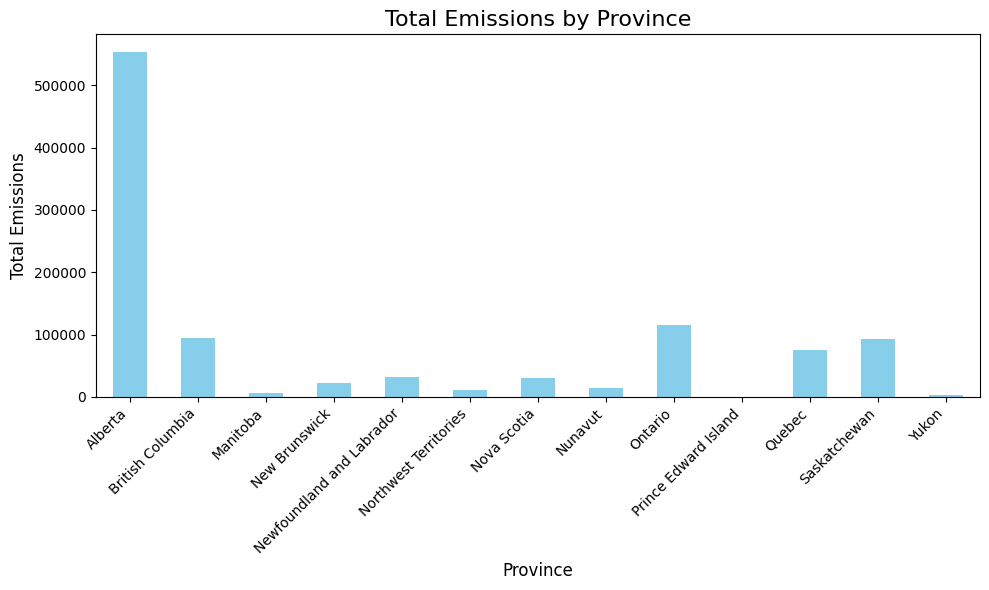

In [70]:
# Group by 'province' and sum the total emissions for each province
province_total_emissions = df_loaded.groupby('province')['amount'].sum()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10,6))
province_total_emissions.plot(kind='bar', color='skyblue')

# Add a title and labels
plt.title('Total Emissions by Province', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Emissions', fontsize=12)

# Display the chart
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better presentation
plt.show()


The province **ALBERTA** is responsible for the majority of emissions (1 mark).

Now find the top 5 cities for emissions *in the top province* (5 marks).

In [78]:
# Step 1: Filter the data for Alberta
alberta_data = df_loaded[df_loaded['province'] == 'Alberta']

# Step 2: Group by 'city' and calculate total emissions for each city
city_emissions = alberta_data.groupby('city')['amount'].sum()

# Step 3: Sort the emissions in descending order and get the top 5 cities
top_cities_alberta = city_emissions.sort_values(ascending=False).head(5)

# Step 4: Display the result
print(top_cities_alberta)


city
Fort Mcmurray    63970.719953
Calgary          37099.008823
Warburg          26172.130000
Duffield         20756.470000
Na               14396.776795
Name: amount, dtype: float64


What do you notice above the top five cities? **Fort McMurray, Calgary, WARBURG, Duffield, Na** (1 mark).

Use the Pandas <code>mask</code> command to correct the issue by replacing one value with the other (4 marks).

In [79]:
import numpy as np

# Step 1: Normalize the capitalization of the 'city' column
df_loaded['city'] = df_loaded['city'].str.title()

# Step 2: Mask "Na" and replace with NaN
df_loaded['city'] = df_loaded['city'].mask(df_loaded['city'].str.lower() == 'na', np.nan)

# Step 3: Filter out rows where 'city' is NaN (i.e., invalid cities)
df_loaded_clean = df_loaded[df_loaded['city'].notna()]

# Step 4: Filter the data for Alberta
alberta_data = df_loaded_clean[df_loaded_clean['province'] == 'Alberta']

# Step 5: Group by 'city' and calculate total emissions for each city
city_emissions = alberta_data.groupby('city')['amount'].sum()

# Step 6: Sort the emissions in descending order and get the top 5 cities
top_cities_alberta = city_emissions.sort_values(ascending=False).head(5)




city
Fort Mcmurray        63970.719953
Calgary              37099.008823
Warburg              26172.130000
Duffield             20756.470000
Fort Saskatchewan    14074.563067
Name: amount, dtype: float64


Re-issue the top 5 cities command to verify that your fix worked (1 mark).

In [80]:
#Display the result
print(top_cities_alberta)

city
Fort Mcmurray        63970.719953
Calgary              37099.008823
Warburg              26172.130000
Duffield             20756.470000
Fort Saskatchewan    14074.563067
Name: amount, dtype: float64


Identify the top 5 NAICS codes by emission amounts. (4 marks).

In [82]:
# Step 1: Group by 'naics' and calculate total emissions for each NAICS code
naics_emissions = df_loaded_clean.groupby('naics')['amount'].sum()

# Step 2: Sort the emissions in descending order and get the top 5 NAICS codes
top_naics = naics_emissions.sort_values(ascending=False).head(5)

# Step 3: Display the result
print(top_naics)


naics
221112    191383.774728
211110    161400.443648
211142     68215.083735
327310     53107.471600
211141     39165.703529
Name: amount, dtype: float64


The top 5 NAICS codes are: **ENTER NAICS CODES HERE** (1 mark).

Create a new data frame that contains only the entries for the top 5 NAICS codes. Use the Pandas command <code>isin</code> command to perform the subsetting (4 marks).

In [83]:
# Step 1: Get the list of top 5 NAICS codes
top_naics_codes = top_naics.index.tolist()

# Step 2: Filter the original DataFrame to include only rows with top 5 NAICS codes
df_top_naics = df_loaded_clean[df_loaded_clean['naics'].isin(top_naics_codes)]




    year                                      company  \
10  2020           Canadian Natural Resources Limited   
11  2021           Canadian Natural Resources Limited   
30  2020       Capital Power Generation Services Inc.   
31  2021       Capital Power Generation Services Inc.   
50  2020  Tidewater Midstream and Infrastructure Ltd.   

                              facility                  city province   naics  \
10             Dunvegan Sour Gas Plant              Fairview  Alberta  211110   
11             Dunvegan Sour Gas Plant              Fairview  Alberta  211110   
30  Genesee Thermal Generating Station               Warburg  Alberta  221112   
31  Genesee Thermal Generating Station               Warburg  Alberta  221112   
50            Ram River Sour Gas Plant  Rocky Mountain House  Alberta  211110   

         amount  
10    291.16700  
11    262.61957  
30  13759.43000  
31  12412.70000  
50    456.30400  


Issue a command to verify that the new data frame only contains the 5 NAICS codes (2 marks).

In [84]:
# Display the result
print(df_top_naics.head())

    year                                      company  \
10  2020           Canadian Natural Resources Limited   
11  2021           Canadian Natural Resources Limited   
30  2020       Capital Power Generation Services Inc.   
31  2021       Capital Power Generation Services Inc.   
50  2020  Tidewater Midstream and Infrastructure Ltd.   

                              facility                  city province   naics  \
10             Dunvegan Sour Gas Plant              Fairview  Alberta  211110   
11             Dunvegan Sour Gas Plant              Fairview  Alberta  211110   
30  Genesee Thermal Generating Station               Warburg  Alberta  221112   
31  Genesee Thermal Generating Station               Warburg  Alberta  221112   
50            Ram River Sour Gas Plant  Rocky Mountain House  Alberta  211110   

         amount  
10    291.16700  
11    262.61957  
30  13759.43000  
31  12412.70000  
50    456.30400  


Make a boxplot of the emission amounts for all five NAICS codes. Split the data by year so that each NAICS code has two boxplots. Be sure to include all boxplots in the same chart (6 marks).

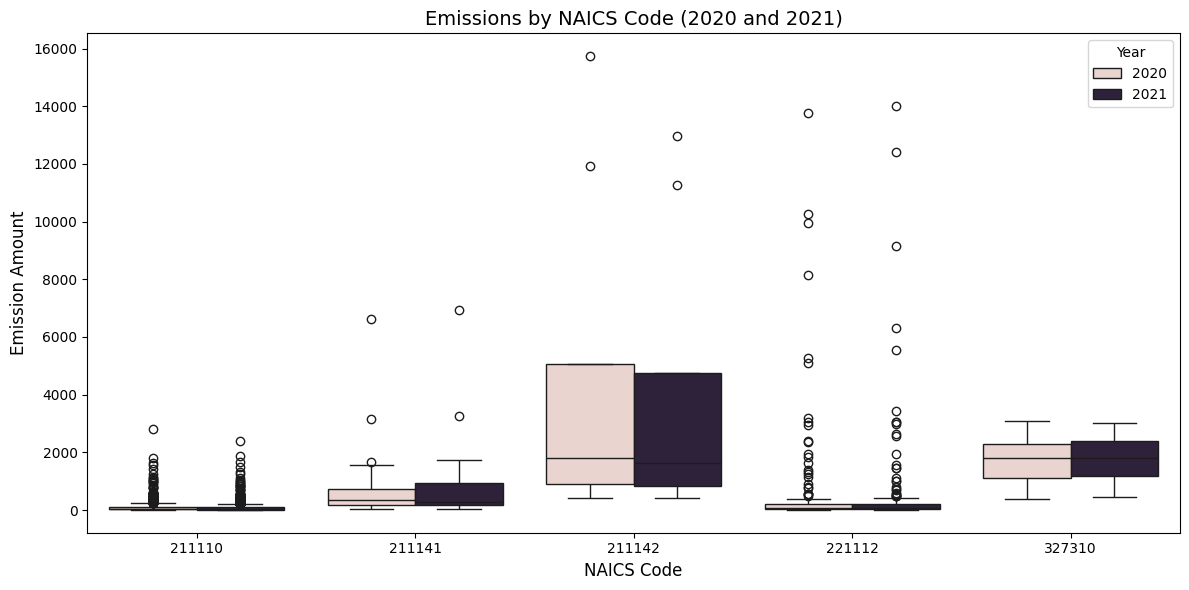

NAICS code with the largest median emissions: 327310
Year with the highest median emissions: 2020


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter the data for the top 5 NAICS codes
df_top_naics_years = df_top_naics[df_top_naics['naics'].isin(top_naics_codes)]

# Step 2: Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='naics', y='amount', hue='year', data=df_top_naics_years)

# Step 3: Add labels and title
plt.title('Emissions by NAICS Code (2020 and 2021)', fontsize=14)
plt.xlabel('NAICS Code', fontsize=12)
plt.ylabel('Emission Amount', fontsize=12)
plt.legend(title='Year')

# Step 4: Show the plot
plt.tight_layout()
plt.show()






Which NAICS code has the largest median amount of emissions? **211142** (1 mark).

Which year has the higher value? **2020** (1 mark).